<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" align="left" src="https://i.creativecommons.org/l/by-nc-sa/4.0/80x15.png" /></a>&nbsp;| [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en) | <a href="https://supaerodatascience.github.io/reinforcement-learning/">https://supaerodatascience.github.io/reinforcement-learning/</a>

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Class 1: Reinforcement Learning fundamentals</div>

## Foreword <a class="tocSkip">


How this course works (pedagogically):
- one notebook to rule them all (them = the concepts)
- no slides
- short exercices along the way
- a bit of live coding
- two class breaks for you to breathe
    
What you should expect:
- some plain words notions,
- but avoidance of over-simplification,
- and also a fair amount of (hopefully painless) rigorous notations and abstract concepts.
- Also most things will be fully written down to increase your autonomy in replaying the notebook.

Duration:  
This notebook was played in the [introductory course](https://rlvs.aniti.fr/rl-fundamentals.html) of the 2021 [Reinforcement Learning Virtual School](https://rlvs.aniti.fr) (video class available). The class lasted 3.5 hours (with breaks).  
For an in-class experience, it is safer to reserve 6 hours.

Color code:
<div class="alert alert-success">Key results in green boxes</div>
<div class="alert alert-warning">Exercices in yellow boxes</div>
<div class="alert alert-danger">Solutions in red boxes</div>

And a first yellow box:

<div class="alert alert-warning">

**Prerequisites:**
- Basic algebra.
- Random variables, probability distributions.
- Gradient descent.
    
**Useful but not compulsory:**
- Random processes, Markov chains.
- Notion of contraction mapping.
- Dynamic Programming
- Stochastic Gradient Descent.
<div>

<h1>Table of Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
<li>
    <span><a href="#Class-goals" data-toc-modified-id="Class-goals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Class goals</a></span>
</li>
<li>
    <span><a href="#Ruining-the-suspense-with-a-general-abstract-definition"
            data-toc-modified-id="Ruining-the-suspense-with-a-general-abstract-definition-2"
            ><span class="toc-item-num">2&nbsp;&nbsp;</span>Ruining the suspense with a general abstract
            definition</a></span>
</li>
<li>
    <span><a href="#RL-within-Machine-Learning"
            data-toc-modified-id="RL-within-Machine-Learning-3"
            ><span class="toc-item-num">3&nbsp;&nbsp;</span>RL within Machine Learning</a></span>
</li>
<li>
    <span><a href="#From-plain-words-to-first-variables"
            data-toc-modified-id="From-plain-words-to-first-variables-4"
            ><span class="toc-item-num">4&nbsp;&nbsp;</span>From plain words to first variables</a></span>
</li>
<li>
    <span><a href="#Modeling-sequential-decision-problems-with-Markov-Decision-Processes"
            data-toc-modified-id="Modeling-sequential-decision-problems-with-Markov-Decision-Processes-5"
            ><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling sequential decision problems with Markov
            Decision Processes</a></span>
    <ul class="toc-item">
        <li>
            <span><a href="#Definition" data-toc-modified-id="Definition-5.1"
                    ><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Definition</a></span>
        </li>
        <li>
            <span><a href="#Value-of-a-trajectory-/-of-a-policy"
                    data-toc-modified-id="Value-of-a-trajectory-/-of-a-policy-5.2"
                    ><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Value of a trajectory / of a policy</a></span>
        </li>
        <li>
            <span><a href="#Optimal-policies" data-toc-modified-id="Optimal-policies-5.3"
                    ><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Optimal policies</a></span>
        </li>
        <li>
            <span><a href="#Summary" data-toc-modified-id="Summary-5.4"
                    ><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Summary</a></span>
        </li>
        <li>
            <span><a href="#Homework:-MDP-notions" data-toc-modified-id="Homework:-MDP-notions-5.5"
                    ><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Homework: MDP notions</a></span>
        </li>
    </ul>
</li>
</ul></div>

## Class goals

- acquire the fundamental building blocks of RL:
    - plain word notions
    - MDPs, policies, optimality equations, etc.
    - common notations
    - key algorithms
    - common misconceptions
- key challenges in RL and their connection to future lectures

## Ruining the suspense with a general abstract definition

What is Reinforcement Learning about?

It is about learning to control dynamic systems.

<center><img src="img/dynamic.png" style="width: 400px;"></img></center>

Dynamic systems? **dynamic** evolution of $s$ and $o$ under $\pi$ over a certain time horizon.

Our object of study:<br>
We want to find a control policy $\pi$ (with $u = \pi(o)$) such that the system $\Sigma$ behaves as we desire.

### Examples of RL problems <a class="tocSkip">

Controler un avion : on a des état avec les alitmètre, la vitesse, ... et quand on utilise les gouverne ca change

<table>
<tr>
  <td><img src="img/spiral.jpg" style="width: 200px;"></td>
  <td style="border-right:1px solid;">Exiting a spiral</td>
  <td><img src="img/tests.jpg" style="width: 200px;"></td>
  <td>Dynamic treatment regimes for HIV patients</td>
</tr>
<tr>
  <td><img src="img/pend.png" style="width: 200px;"></td>
  <td style="border-right:1px solid;">Cart-pole balancing</td>
  <td><img src="img/waiting.jpg" style="width: 200px;"></td>
  <td>Queueing problems</td>
</tr>
<tr>
  <td><img src="img/market.jpg" style="width: 200px;"></td>
  <td style="border-right:1px solid;">Portfolio management</td>
  <td><img src="img/dam.jpg" style="width: 200px;"></td>
  <td>Hydroelectric production</td>
</tr>
</table>

But also:
- Elevator scheduling
- Bicyle riding
- Ship steering
- Bioreactor control
- Aerobatics helicopter control
- Airport departures scheduling
- Ecosystem regulation and preservation
- Robocup soccer
- Video game playing (Atari, Starcraft...)
- Game of Go
- ...

So, learning to play a board game, learning to juggle, learning to take good strategic decisions, learning to drive... all fall into the same category of **control problems** and Reinforcement Learning studies the process of **elaborating a good control strategy through interaction samples**.

<div class="alert alert-success">
    
Reinforcement Learning is about learning an optimal sequential behavior in a given environment.
</div>

Let's break this down.
- sequential behavior in a given environment  
$\rightarrow$ discrete time steps, sequence of actions
- optimal  
$\rightarrow$ a reward signal informs us of the quality of the last action
- learning  
$\rightarrow$ no known model, just interaction samples, behavior adaptation.

<center><img src="img/dynamic.png" style="width: 400px;"></img></center>

<div class="alert alert-success">

**Keywords:**
- system to control / environment
- control policy
- optimality
</div>

On discrétise en pas de temps. On cherche un état  optimale et on défini une fonction de récompense qui permet de dire si l'état dans lequel on est bonne ou non.

<div class="alert alert-warning">
    
**Warm-up poll:** 
How do you do today?  
[https://linkto.run/p/BOOR15YA](https://linkto.run/p/BOOR15YA)
- Great, I'm learning RL!
- Great, but I'm scared the RL unicorn will turn into a difficult to tame rhino.
- Great, bring the math on (as long as you do it step by step).
- Why do you ask the question if the only answer is "Great"?
</div>

**Standing on the shoulders of giants**

> The idea that we learn by interacting with our environment is probably the first to occur to us when we think about the nature of learning. When an infant plays, waves its arms, or looks about, it has no explicit teacher, but it does have a direct sensorimotor connection to its environment. Exercising this connection produces a wealth of information about cause and effect, about the consequences of actions, and about what to do in order to achieve goals. Throughout our lives, such interactions are undoubtedly a major source of knowledge about our environment and ourselves. Whether we are learning to drive a car or to hold a conversation, we are acutely aware of how our environment responds to what we do, and we seek to influence what happens through our behavior. Learning from interaction is a foundational idea underlying nearly all theories of learning and intelligence. (Sutton & Barto, 2018, [Reinforcement Learning: an Introduction](http://incompleteideas.net/book/the-book-2nd.html))

Caveat: this is a definition of *learning*, not specifically of *reinforcement learning* (although it applies to RL), so it is worth giving some context.

## RL within Machine Learning

You may have had classes on Machine Learning before. There are three strongly distinct categories of problems in ML:
- Supervised Learning
- Unsupervised Learning
- Reinforcement Learning

Let's try to answer the following questions for each category.
- What's the abstract problem we are trying to solve?
- What's the data provided to the algorithms?
- Give examples of algorithms in SL/UL/RL.  

<center>
<table border="1">
<tr>
    <td> <b>Question</b> </td>
    <td style="border-left: 1px solid black"> <b>Supervised</b> </td>
    <td style="border-left: 1px solid black"> <b>Unsupervised</b> </td>
    <td style="border-left: 1px solid black"> <b>Reinforcement</b> </td>
</tr>
<tr>
    <td> Target </td>
    <td style="border-left: 1px solid black"> $ f(x)=y $ </td>
    <td style="border-left: 1px solid black"> $ x\in X $ </td>
    <td style="border-left: 1px solid black"> $ \pi(s)=a $ </td>
</tr>
<tr>
    <td> Target (rephrased) </td>
    <td style="border-left: 1px solid black"> Predict outputs given inputs</td>
    <td style="border-left: 1px solid black"> Discover structure in data </td>
    <td style="border-left: 1px solid black"> Find an optimal behavior </td>
</tr>
<tr>
    <td> Data </td>
    <td style="border-left: 1px solid black"> {(x,y)} supervisor's labels </td>
    <td style="border-left: 1px solid black"> {x} unlabelled data </td>
    <td style="border-left: 1px solid black"> {(s,a,r,s')} experience samples </td>
</tr>
<tr>
    <td> Output </td>
    <td style="border-left: 1px solid black"> Classifier or regressor</td>
    <td style="border-left: 1px solid black"> Clusters or dimension reduction </td>
    <td style="border-left: 1px solid black"> Policies, value functions </td>
</tr>
<tr>
    <td> Key algorithms </td>
    <td style="border-left: 1px solid black"> Neural networks, SVMs, etc.</td>
    <td style="border-left: 1px solid black"> k-means, PCA, etc. </td>
    <td style="border-left: 1px solid black"> Q-learning, Policy Gradients, etc. </td>
</tr>
</table>
</center>

This table helps distinguish the different natures of the problems tackled. The RL problem is about finding the optimal policy for a given environment.

A un état donnée s, on a fait une action a, qui nous donne une récompense r et  cela donne une nouvel éta s'

How is this different from Supervised Learning?
- no correct $(s,a)$ example, rather $(s,a,r,s')$ samples
- Delayed rewards, credit assignment, trajectories

<div class="alert alert-warning">
    
**Poll:** Pick the true statement(s).  
[https://linkto.run/p/3OG3IJO3](https://linkto.run/p/3OG3IJO3)
- Sorting new emails as spam (or not) given a million labelled emails is a reinforcement learning task.
- Deciding what move to play at chess, based on thousands of previous games is a reinforcement learning task.
- Incrementally improving the accuracy of a radar detection software from online collected data is a reinforcement learning task.
</div>

Inspirations for RL:
- Control theory and Stochastic processes for the **modeling** part
- Statistics, Optimization and Cognitive Psychology for the **learning** part

## From plain words to first variables

### A medical prescription example <a class="tocSkip">

<center><img src="img/patient-doctor.png" style="height: 200px;"></center>
    
A patient walks into a clinic with her medical file (medical history, x-rays, blood work, etc.). You, as her doctor, need to write a prescription. Let us use this example to formalize the process of deciding what to write on the prescription.

### Patient variables <a class="tocSkip">

<center>
<div style="background-color:white; color:black; padding:15px;">
<img src="img/patient_file.png" style="height: 100px;"> </img> <br>
</div>
Patient state now: $S_0$  <br>
Future states:$S_t$
</center>

The medical file of the patient allows us to define a number of variables that characterize the patient now. We will write $S_0$ the vector of these variables. Future measurements will be noted $S_t$.

$S_t$ is a random vector, taking different values in a *patient description space* $S$ at different time steps.

### Prescription <a class="tocSkip">

<center>
<div style="background-color:white; color:black; padding:15px;">

<img src="img/prescription.png" style="height: 100px;"> </img> <br>
</div>

Prescription: $\left( A_t \right)_{t\in\mathbb{N}} = (A_0, A_1, A_2, ...)$
</center>

The prescription is a series of recommendations we give to the patient over the course of treatment. It is thus a sequence $\left( A_t \right)_{t\in\mathbb{N}} = (A_0, A_1, A_2, ...)$ of variables $A_t$.

These treatments $A_t$ are random variables too, taking their value in some space $A$.

### Patient evolution <a class="tocSkip">


<center>
<div style="background-color:white; color:black; padding:15px;">

<img src="img/patient_evolution.png" style="height: 100px;"> </img> <br>
    $\mathbb{P}(S_t)$?
</div>

</center>

The patient evolves over time steps. Her evolution follows a certain probability distribution $\mathbb{P}(S_t)$ over descriptive states.

So $\left( S_t \right)_{t\in\mathbb{N}}$ defines a *random process* that describes the patient's evolution under the influence of past $S_t$ and $A_t$.

### Physician's goal <a class="tocSkip">

<center>
<div style="background-color:white; color:black; padding:15px;">
<img src="img/patient_happy.png" style="height: 100px;"> </img> <br>

</div>

</center>

$$J \left( \left(S_t\right)_{t\in \mathbb{N}}, \left( A_t \right)_{t\in \mathbb{N}} \right)?$$

The physician's goal is to bring the patient from an unhealthy state $S_0$ to a healthy situation.  

This goal is not only defined by a final state of the patient but by the full trajectory followed by the variables $S_t$ and $A_t$. For example, prescribing a drug that damages the patient's liver, or letting the patient experience too much pain over the course of treatment is discouraged.

We define a criterion $J \left( \left(S_t\right)_{t\in \mathbb{N}}, \left( A_t \right)_{t\in \mathbb{N}} \right)$ that allows to quantify how good a trajectory in the joint $S\times A$ space is.

### Wrap-up <a class="tocSkip">

- Patient state $S_t$  (random variable)
- Physician instruction $A_t$ (random variable)
- Prescription $\left( A_t \right)_{t\in\mathbb{N}}$   
- Patient's evolution $\mathbb{P}(S_t)$  
- Patient's trajectory $\left( S_t \right)_{t\in\mathbb{N}}$ random process
- Value of a trajectory $J \left( \left(S_t\right)_{t\in \mathbb{N}}, \left( A_t \right)_{t\in \mathbb{N}} \right)$  

It seems reasonable that the physician's recommendation $\mathbb{P}(A_t)$ at step $t$ be dependent on previously observed states $\left(S_0, \ldots, S_t\right)$ and recommended treatments $\left(A_0, \ldots, A_{t-1}\right)$.

### Common misconception <a class="tocSkip">

You will often see the following type of drawing, along with a sentence like "RL is concerned with the problem on an agent performing actions to control an environment". 

<center><img src="img/misconception.png" style="height: 300px;"></img></center>

Although this sentence is not false *per se*, it conveys an important misconception that may be grounded in too simple anthropomorphic analogies. One often talks about the *state of the agent* or the *state of the environment*. The distinction here is confusing at best: there is no separation between agent and environment. A better vocabulary is to talk about a *system to control*, that is described through its observed *state*. This system is controlled by the application of actions issued from a *policy* or *control law*. The process of *learning* this policy is what RL is concerned with.

Although less shiny, the drawing below may be less misleading.

<center><img src="img/dynamic.png" style="height: 300px;"></img></center>

### Three key notions <a class="tocSkip">

Understanding RL is a three-stage rocket, answering the questions:  
1. What is the system to control?  
2. What is an optimal strategy?  
3. How do we learn such a strategy?

<div class="alert alert-warning">
    
**Exercise (no poll):**  
Suppose that, instead of treating a patient, we want to learn to swing the pole up in the cart-pole example.  
What are the state description variables?  
What are the action variables?
</div>

<img src="img/pend.png" style="width: 300px;">

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

State: cart position and velocity $x, \dot{x}$, pole angle and velocity $\theta, \dot{\theta}$.
    
Action: force $F$ applied on the cart.
</details>

## Modeling sequential decision problems with Markov Decision Processes

### Definition

Let's take a higher view and develop a general theory for describing problems such as writing a prescription for our patient.

Let us assume we have:
- a set of states $S$ describing the system to control,
- a set of actions $A$ we can apply.

Curing patients is a conceptually difficult task. 
To keep things grounded, we shall use a toy example called [FrozenLake](https://gym.openai.com/envs/FrozenLake-v0/) and work our way to more general concepts. It's also the occasion to familiarize with [OpenAI Gym](https://gym.openai.com/).

<center><img src="img/frisbee.jpg" style="height: 300px;"></img></center>

In [8]:
import gymnasium as gym
import gymnasium.envs.toy_text.frozen_lake as fl

env = gym.make("FrozenLake-v1", render_mode="ansi") # use render_mode="human" to open the game window
env.reset()
print(env.render())


SFFF
FHFH
FFFH
HFFG



In [7]:
# useful only if you have used render_mode="human" in the cell above
env.close()

The game's goal is to navigate across this lake, from position S to position G, in order to retrieve a frisbee, while avoiding falling into the holes H. Frozen positions are slippery so you don't always move in the intended direction. Reaching the goal provides a reward of 1, and zero otherwise. Falling into a hole or reaching the goal ends an episode.

Take a look at the funny description in `help(fl.FrozenLakeEnv)` if you are curious.

<div class="alert alert-warning">
    
**Poll:**  
[https://linkto.run/p/65E9EO4Q](https://linkto.run/p/65E9EO4Q)  
How many states are there in this game?  
How many actions?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

States set: the 16 positions on the map.  
Actions set: the 4 actions $\{$N,S,E,W$\}$.
</details>

Let's confirm that:

In [9]:
print(env.observation_space)
print(env.action_space)

Discrete(16)
Discrete(4)


At every time step, the system state is $S_t$ and we decide to apply action $A_t$. This results in observing a new state $S_{t+1}$ and receiving a scalar reward signal $R_t$ for this transition.

$R_t$ tells us how happy we are with the last transition.

For example, in FrozenLake, all transitions have reward 0 except for the one that reaches the goal, which yields reward 1. Let's verify this and introduce a few utility functions on the way.

Note that $S_t$, $A_t$, $S_{t+1}$ and $R_t$ are random variables.

In [10]:
actions = {fl.LEFT: "\u2190", fl.DOWN: "\u2193", fl.RIGHT: "\u2192", fl.UP: "\u2191"}

def to_s(row,col):
    return row * env.unwrapped.ncol + col

def to_row_col(s):
    col = s % env.unwrapped.ncol
    row = int((s - col) / env.unwrapped.ncol)
    return row, col

print(actions)
row = 3
col = 2
a = 2
print(f"Apply {actions[2]} from ({row}, {col}):")
for tr in env.unwrapped.P[to_s(row,col)][a]:
    print(f"  Reach ({to_row_col(tr[1])}) and get reward {tr[2]} with proba {tr[0]}.")

{0: '←', 1: '↓', 2: '→', 3: '↑'}
Apply → from (3, 2):
  Reach ((3, 2)) and get reward 0 with proba 0.33333333333333337.
  Reach ((3, 3)) and get reward 1 with proba 0.3333333333333333.
  Reach ((2, 2)) and get reward 0 with proba 0.33333333333333337.


Markov = proba de passer a un niveau état t+1 ne dépend que de l'état précédent

A (Markovian) transition model $\mathbb{P}\left(S_{t+1} | S_t, A_t \right)$, noted $p(s'|s,a)$
A reward model $\mathbb{P}\left( R_t | S_t, A_t, S_{t+1} \right)$, noted $r(s,a)$ or $r(s,a,s')$
A set of discrete decision epochs $T=\{0,1,\ldots,H\}$

We will now make our main assumption about the systems we want to control.

<div class="alert alert-success">
    
**Fundamental assumption (Markov property)**
$$\mathbb{P}(S_{t+1},R_t|S_t, A_t, S_{t-1}, A_{t-1}, \ldots, S_0, A_0) = \mathbb{P}(S_{t+1},R_t|S_t, A_t)$$
</div>
    
Such a system will be called a Markov Decision Process (MDP).

One generally separates the state dynamics and the rewards by:
$$\mathbb{P}(S_{t+1},R_t|S_t, A_t) = \mathbb{P}(S_{t+1}|S_t, A_t)\cdot \mathbb{P}(R_t|S_t, A_t, S_{t+1})$$

Which leads in turn to the general definition of an MDP:
<div class="alert alert-success"><b>Markov Decision Process (MDP)</b><br>
A Markov Decision Process is given by:
<ul>
<li> A set of states $S$
<li> A set of actions $A$
<li> A (Markovian) transition model $\mathbb{P}\left(S_{t+1} | S_t, A_t \right)$, noted $p(s'|s,a)$
<li> A reward model $\mathbb{P}\left( R_t | S_t, A_t, S_{t+1} \right)$, noted $r(s,a)$ or $r(s,a,s')$
<li> A set of discrete decision epochs $T=\{0,1,\ldots,H\}$
</ul>
</div>

A (Markovian) transition model $\mathbb{P}\left(S_{t+1} | S_t, A_t \right)$, noted $p(s'|s,a)$

A reward model $\mathbb{P}\left( R_t | S_t, A_t, S_{t+1} \right)$, noted $r(s,a)$ or $r(s,a,s')$

A set of discrete decision epochs $T=\{0,1,\ldots,H\}$





Most of the results presented here can be found in M. L. Puterman's classic book, [Markov Decision Processes: Discrete Stochastic Dynamic Programming](https://www.wiley.com/en-us/Markov+Decision+Processes%3A+Discrete+Stochastic+Dynamic+Programming-p-9781118625873).

If $H\rightarrow\infty$ we have an infinite horizon control problem.

<div class="alert alert-success">

Since we will only work with infinite horizon problems, we shall identify the MDP with the 4-tuple $\langle S,A,p,r\rangle$.
</div>
    
So, in RL, we wish to control the trajectory of a system that, we suppose, behaves as a Markov Decision Process.

<center><img src="img/dynamic.png" style="height: 240px;"></img></center>

### Value of a trajectory / of a policy

An oracle decides on how to choose actions at each time step:
$$A_t \sim \pi_t.$$

$\pi_t$ is called the **decision rule** at step $t$, it is a distribution over the action space $A$.  
The collection $\pi = \left(\pi_t \right)_{t\in\mathbb{N}}$ is the oracle's **policy**.

<center><img src="img/frisbee.jpg" style="height: 100px;"></img></center>

One policy implies one specific distribution over trajectories over the frozen lake. More generally, the policy and $S_0$ condition the sequence $S_0, A_0, R_0, S_1, A_1, R_1, \ldots$

In FrozenLake as in the patient's example, some trajectories are better than others. We need a criterion to compare trajectories. Intuitively, this criterion should reflect the idea that a good policy accumulates as much reward as possible along a trajectory.

Let's compare the policy that always moves to the right and the policy that always moves left by summing the rewards obtained along trajectories and then averaging these rewards across trajectories.

In [12]:
import numpy as np
from tqdm import trange

nb_episodes = 50000
horizon = 200

env = gym.make("FrozenLake-v1", render_mode="ansi")

Vright = np.zeros(nb_episodes)
for i in trange(nb_episodes):
    env.reset()
    for t in range(horizon):
        next_state, r, done, _, _ = env.step(fl.RIGHT)
        Vright[i] += r
        if done:
            break

Vleft  = np.zeros(nb_episodes)
for i in trange(nb_episodes):
    env.reset()
    for t in range(horizon):
        next_state, r, done, _, _ = env.step(fl.LEFT)
        Vleft[i] += r
        if done:
            break

print("est. value of 'right' policy:", np.mean(Vright), "variance:", np.std(Vright))
print("est. value of 'left'  policy:", np.mean(Vleft),  "variance:", np.std(Vleft))

100%|██████████| 50000/50000 [00:04<00:00, 10606.19it/s]

est. value of 'right' policy: 0.03112 variance: 0.17364200413494427
est. value of 'left'  policy: 0.0 variance: 0.0


On voit que la policy aller tjrs a droite arrive parfois a l'objectif car on peut glisser. Alors que la policy aller a gauche ne fonctionne pas.

In the general case, this sum of rewards on an infinite horizon might be unbounded. So let us introduce the **$\gamma$-discounted sum of rewards** (from a starting state $s$, under policy $\pi$) random variable:
$$G^\pi(s) = \sum\limits_{t = 0}^\infty \gamma^t R_t \quad \Bigg| \quad \begin{array}{l}S_0 = s,\\ A_t \sim \pi_t,\\ S_{t+1}\sim p(\cdot|S_t,A_t),\\R_t = r(S_t,A_t,S_{t+1}).\end{array}$$
$\gamma$ appartien a [0,1[

    
$G^\pi(s)$ represents what we can gain in the long-term by applying the actions from $\pi$.

Then, given a starting state $s$, we can define the value of $s$ under policy $\pi$:
$$V^\pi(s) = \mathbb{E} \left[ G^\pi(s) \right]$$

This defines the value function $V^\pi$ of policy $\pi$:
<div class="alert alert-success"><b>
</div>

Value function $V^\pi$ of a policy $\pi$ under a $\gamma$-discounted criterion</b><br>
$$V^\pi : \left\{\begin{array}{ccl}
S & \rightarrow & \mathbb{R}\\
s & \mapsto & V^\pi(s)=\mathbb{E}\left( \sum\limits_{t = 0}^\infty \gamma^t R_t \bigg| S_0 = s, \pi \right)\end{array}\right. $$
<div class="alert alert-success"><b>
</div>

And, given a distribution $\rho_0$ on starting states, we can map $\pi$ to the scalar value:
$$J(\pi) = \mathbb{E}_{s \sim \rho_0} \left[ V^\pi(s) \right]$$

Note that this definition is quite arbitrary: instead of the expected (discounted) sum of rewards, we could have taken the average reward over all time steps, or some other (more or less exotic) comparison criterion between policies.

Most of the RL literature uses this discounted criterion (in some cases with $\gamma=1$), some uses the average reward criterion, and few works venture into more exotic criteria. Today, we will limit ourselves to the discounted criterion.

### Optimal policies

The fog clears up a bit: we can now compare policies given an initial state (or initial state distribution).  

Thus, an **optimal** policy is one that is better than any other.

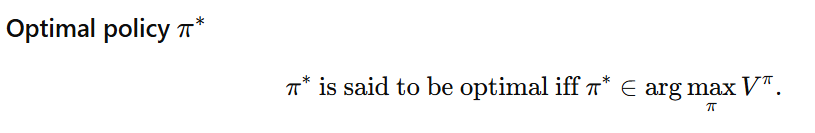
<div class="alert alert-success">
</div>

    
A policy is optimal if it **dominates** over any other policy in every state:
$\pi^* \textrm{ is optimal}\Leftrightarrow \forall s\in S, \ \forall \pi, \ V^{\pi^*}(s) \geq V^\pi(s)$
<div class="alert alert-success">

</div>

Note that although there may be several optimal policies, they all share the same value function $V^* = V^{\pi^*}$.

We now get to our first fundamental result. Fortunately for us...  



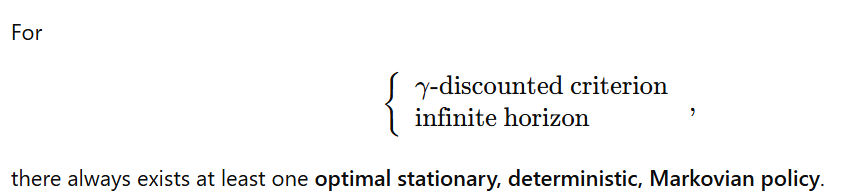


Let's explain a little:
- Markovian: all decision rules are only conditioned by the last seen state. Mathematically: 
$\left\{\begin{array}{l}
\forall \left(s_i,a_i\right)_{i\leq t-1}\in \left(S\times A\right)^{t-1}\\
\forall \left(s'_i,a'_i\right)_{i\leq t-1}\in \left(S\times A\right)^{t-1}\\
\forall s \in S
\end{array}\right., \pi_t\left(A_t|S_0=s_0, A_0=a_0, \ldots, S_t=s\right) = \pi_t\left(A_t|S'_0=s'_0, A'_0=a'_0, \ldots, S_t=s\right)$.  
One writes $\pi_t(A_t|S_t=s)$, or more simply $\pi_t(\cdot | s)$.
- Stationary (and Markovian): all decision rules are the same throughout time. Mathematically:  
$\forall (t,t')\in \mathbb{N}^2, \pi_t(A_t|S_t=s) = \pi_t(A_{t'}|S_{t'}=s)$.  
This unique distribution is written $\pi(\cdot | s) = \pi_t( \cdot | s)$.
- Deterministic: all decision rules put all probability mass on a single item of the action space $A$.  
$\pi_t(A_t|history) = \left\{\begin{array}{l}
1\textrm{ for a single }a\\
0\textrm{ otherwise}
\end{array}\right.$.

So in simpler words, we know that among all possible optimal ways of picking $A_t$, at least one is a function $\pi:S\rightarrow A$.

That helps a lot: we don't have to search for optimal policies in a complex family of history-dependent, stochastic, non-stationary policies; instead we can simply search for a function $\pi(s)=a$ that maps states to actions.

### Summary

Let's wrap this whole section up. Our goal was to formally define the search for the best strategy for our game of FrozenLake and the medical prescription problem. This has led us to formalizing the general **discrete-time stochastic optimal control problem**:
- Environment (discrete time, non-deterministic, non-linear, Markov) $\leftrightarrow$ MDP.
- Behaviour $\leftrightarrow$ control policy $\pi : s\mapsto a$.
- Policy evaluation criterion $\leftrightarrow$ $\gamma$-discounted criterion.
- Goal $\leftrightarrow$ Maximize value function $V^\pi(s)$.

So we have built the first stage of our three-stage rocket:  
<div class="alert alert-success">
    
**What is the system to control?**  
The system to control is a Markov Decision Process $\langle S, A, p, r \rangle$ and we will control it with a policy $\pi:s\mapsto a$ in order to optimize $\mathbb{E} \left( \sum_t \gamma^t R_t\right)$
</div>

<div class="alert alert-warning">

**Poll** The limits of MDP modeling  
[https://linkto.run/p/0WG7WNER](https://linkto.run/p/0WG7WNER)  
Can these systems be modeled as MDPs?   
- Playing a tennis video game based on a single video frame -> Non car sur une frame on a pas la vitesse de la balle
- Playing a tennis video game based on a full physical description of the ball and the players -> Oui
- The game of Poker
- The collaborative game of [Hanabi](https://en.wikipedia.org/wiki/Hanabi_(card_game))
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

A single video frame does not contain enough information to accurately represent the current state of the game. The velocities are absent for instance. Hence the dynamics might not be Markovian.
    
A full physical description, however, may contain enough information so that $\mathbb{P}(S_{t+1})$ is only conditioned by $S_t$ and $A_t$.
    
Poker is a two-player, adversarial, stochastic game. MDPs only model one-player games.

Beyond the fact that it is a multi-player game. Hanabi is a game based mainly on epistemic reasoning. That is, reasoning on beliefs about the state of the world (specifically, the state of the other players' hand). This type of state description is difficult to encode within a Markovian dynamics model.

**A bit of additional discussion to generalize these notions:**

What if the system is an MDP but its state is not fully observable?  
$\rightarrow$ This is the (exciting) field of Partially Observable MDPs. Our key result of having a Markovian optimal policy does not hold anymore. There are ways to still obtain optimal policies (but it is often very computationaly costly) or approximate them with Markovian policies.

What happens if there are multiple actions taken at the same time by different agents?  
$\rightarrow$ This falls into the category of multi-player stochastic games. Such games can be adversarial, cooperative, or a mix of the two. Of course they can also have partial observability.

What if the transition model is not Markovian?  
$\rightarrow$ Beware, here be dragons! All the beautiful framework above crumbles down if its hypothesis are violated. So great care should be taken when choosing the state variables for a given problem. In a sense, an MDP is a discrete time version of a first-order differential equation. Writing a system as $\dot{X} = f(X,U, noise)$ as is common in Control Theory is a good practice to ensure the Markov property.
</details>

<div class="alert alert-warning">
    
**Let's take a short break.**  
**If there is time, I can take questions.**
</div>

### Homework: MDP notions

The exercises below are here to help you play with the concepts introduced above, to better grasp them. They are not optional to reach the class goals. Often, the provided answer reaches out further than the plain question asked and provides comments, additional insights, or external references.

<div class="alert alert-warning">
    
**Exercise**  
In the text above, we wrote that $\pi_t$ is the distribution over the action space $A$ for the action $A_t$ taken at time step $t$.  
- Write this probability $\mathbb{P}(A_t)$ as a conditional probability $\pi_t(A_t|\ldots)$ (the real question is: what are the $\ldots$?).
- Rephrase, with your own words, what this $\pi_t(A_t|\ldots)$ indicates.  
Then we defined a policy $\pi$ as the collection of decision rules $\left( \pi_t \right)_{t\in\mathbb{N}}$.
- Using the answer to the previous questions, write the definition of a Markovian policy, then a stationary Markovian policy (the answer is actually in the text just after the Optimal policy theorem, the exercise is about being able to recall and explain the definitions and what they imply). 
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

- $\pi_t$ describes the distribution over actions at time step $t$. Because of causality (future events don't affect current events), it can only depend on the realization of the state and actions random variables in previous time steps:
$$\mathbb{P}(A_t) = \pi_t(A_t | S_0, A_0, \ldots, S_{t-1}, A_{t-1}, S_t)$$
We define the *history* $H_t = S_0, A_0, \ldots, S_{t-1}, A_{t-1}, S_t$ at time step $t$ as this random sequence. So:
$$\mathbb{P}(A_t) = \pi_t(A_t | H_t)$$

- In plain words, for an action $a$ and a history $h$ at step $t$, $\pi_t(a|h)$ indicates  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; the probability to pick action $a$  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; at time $t$,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; given the history of states/actions $h$.  
This is called a *history-dependent, non-stationary, stochastic* policy and is the most generic class of policies.

- In a Markovian policy, all decision rules are only conditioned by the last encountered state.
$$\pi_t(A_t|H_t) = \pi_t(A_t | S_t)$$
In other words, given two (possibly different) sequences of state-action random variables realizations up to time $t-1$ and a single realization of S_t the distribution of $A_t$ is the same.
Mathematically: 
$\left\{\begin{array}{l}
\forall \left(s_i,a_i\right)_{i\leq t-1}\in \left(S\times A\right)^{t-1}\\
\forall \left(s'_i,a'_i\right)_{i\leq t-1}\in \left(S\times A\right)^{t-1}\\
\forall s \in S
\end{array}\right.,$
\begin{align*}
    \pi_t(A_t|H_t) &= \pi_t\left(A_t|S_0=s_0, A_0=a_0, \ldots, S_t=s\right)\\
    &= \pi_t\left(A_t|S'_0=s'_0, A'_0=a'_0, \ldots, S_t=s\right)\\
    &= \pi_t(A_t | S_t)
\end{align*}
One writes $\pi_t(A_t|S_t=s)$, or more simply $\pi_t(\cdot | s)$.  
In a stationary Markovian policy, all decision rules are the same throughout time. Mathematically:  
$\forall (t,t')\in \mathbb{N}^2, \pi_t(A_t|S_t=s) = \pi_t(A_{t'}|S_{t'}=s)$.  
This unique distribution is written $\pi(\cdot | s) = \pi_t( \cdot | s)$.
</details>

<div class="alert alert-warning">

**Exercise**  
In the patient example, suppose the physician tells the patient to take drug A every day for 5 days, then drug B every two days for 9 days, then come back for a check-up. The physician adds to take drug C once a day if the patient feels pain over two consecutive days. Can you write the sequence of corresponding decision rules?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

This prescription is made over a finite horizon $H=14$ days. The actions are the combinations of drugs $A=\left\{ \emptyset, (A), (B), (C), (A,B), (A,C), (B,C), (A,B,C) \right\}$.   
    
The prescription is deterministic: the distribution over actions is a Dirac. We will write it $a_t = \pi_t(h)$.
    
The prescription depends on the two last states of the patient. So it's not Markovian, it is history-dependent. Precisely, it depends on the boolean state variable "is there pain?". So we can write $\pi_t(h) = \pi_t(s_t,s_{t-1})$.  
  
It also is not stationary, since the prescription changes after day 5.  
    
Consequently, the policy is:  
For $t \in [1, 5]$:   
if $pain(s_t,s_{t-1})=True$, $\pi_t(s_t,s_{t-1}) = (A,C)$,  
if $pain(s_t,s_{t-1})=False$, $\pi_t(s_t,s_{t-1}) = (A)$.  
For $t \in [6, 14]$:   
if $t$ is even and $pain(s_t,s_{t-1})=True$, $\pi_t(s_t,s_{t-1}) = (B,C)$,  
if $t$ is even and $pain(s_t,s_{t-1})=False$,  $\pi_t(s_t,s_{t-1}) = (B)$,  
if $t$ is odd and $pain(s_t,s_{t-1})=True$, $\pi_t(s_t,s_{t-1}) = (C)$,  
if $t$ is odd and $pain(s_t,s_{t-1})=False$,  $\pi_t(s_t,s_{t-1}) = \emptyset$
</details>

<div class="alert alert-warning">

**Exercise**  
Use the FrozenLake environment we've introduced earlier to obtain a Monte-Carlo estimate of $V^\pi(s_0)$ over 100000 trials, with $s_0$ being the initial state and $\pi$ being a simple policy that always goes right. Take $\gamma = 0.9$. Yes, the code is almost the same as the example provided earlier.  
Note that $\gamma^{200} \sim 10^{-9}$ so any reward obtained after 200 time steps will have a negligible contribution to $V^\pi(s_0)$, thus rolling an episode out for 200 time steps should be sufficient.
</div>

In [ ]:
# %load solutions/RL1_exercise1.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

<div class="alert alert-warning">

**Exercise and note on the stationary distribution under policy $\pi$**  

Let's consider an MDP and a certain policy $\pi$. Let's initialize the MDP to a starting state $s_0$ drawn from a distribution $\rho_0(s)$ and let's look at how the state evolves across time steps.

Because the stochastic process of $S_t$ is a Markov chain (since $\pi$ is fixed, the probability of reaching $S_{t+1}$ is only conditionned by $S_t$), in the long run, the distribution of states follows a stationary distribution $\rho^\pi(s|s_0)$.

This distribution is not necessarily unique: it depends on $s_0$. When all states are represented with non-zero probability in this distribution, the corresponding Markov chain is said to be *ergodic*. This is an assumption that will often be made to simplify future reasoning, even if it is false most of the time.

What can we say about the stationary distribution of the Markov chain corresponding to:
- the patient with a chronic disease under a policy that fights off the disease?
- the patient with a deadly disease under a policy that doesn't cure her?
- the FrozenLake example with a fixed random policy?
- the Mad Hatter's casino (from the previous class) under a fixed random policy?
</div>

<details class="alert alert-danger">
    <summary markdown="span"><b>Ready to see the answer? (click to expand)</b></summary>

The patient with a chronic disease under a policy that fights off the disease will most likely live a rather long life (let's say infinite, for the sake of this example) and will explore states that are linked to the evolution of the disease. The states corresponding to non-recoverable situations however will not be visited.
    
The patient with a deadly disease and a bad treatment policy will likely die, sadly. On an infinite horizon, the stationary distribution only has probability mass on the states corresponding to death.
    
Similarly, the FrozenLake example has several terminal states, either by reaching the goal or by falling into a hole. It should be noted however that for such episodic environments, it is possible to define an alternate distribution $\rho^\pi(s|s_0)$ that describes the distribution of states before termination.
    
Finally, the Mad Hatter's casino under a fixed random policy is a very nice ergodic Markov chain: from any starting state there is a non-zero probability of reaching any state in a finite number of steps. No terminal states in wonderland!
</details>